LAB2.0:https://mountain-hydrology-research-group.github.io/data-analysis/labs/lab2.0/

# Problem 1, Use Sauk peak flow data updated through water year 2017 (in folder):

 



A) Decide which of your plots from Homework 1 are relevant to the questions of whether a change in flood statistics occurred in the Sauk around 1977. Include these graphs here and discuss what you can see visually in the graphs that would lead you to believe that a change has or has not occurred.

In [45]:
%%html
<img src='Fig8.png'>

In [46]:
%%html
<img src='Fig9.png'>

# <font color='red'>Answer
Dividing by 1975, we can see that the overall peak flows before 1975 are much lower than after 1975 (by Fig. 9), which suggests that the peak flows before that time point has a lower average and lower maximum. However when comparing the CDF trend for before/after 1975 (by Fig. 8) we can tell that the trend after 1975 is very near to the whole period change, which suggests that there is a change before 1975 comparing to the whole periods. It was these overall peak value behaviors change make me believe that there was a change happened at the 1975.

B) [Make sure you are using the updated data through 2017.] Postulating a change in flood statistics around 1977, test for statistical significance of the observed change in the mean annual flood. Use a two sample test, and alpha = 0.05 (i.e. 95% confidence) and the z distribution to define the rejection region (why is this appropriate?). Compare the period from 1977-2017 to the data from 1929-1976, accounting for the different sample sizes and sample standard deviations appropriately. For your null hypothesis, postulate that the difference between the two means = 0, and state the alternative hypothesis that the difference has changed (although you don’t know the direction of this change) and the appropriate test statistic. Can you reject the null hypothesis? Calculate P. How would your estimate of P change if your null hypothesis is that the difference in the mean between the two data sets is equal to 15% of the pre-1977 sample mean? (In other words, the null hypothesis is that the mean of the second period is 1.15 times the mean of the first period.)

In [47]:
import pandas as pd

# To plot
import matplotlib.pyplot as plt
import numpy as np

import math
import scipy.stats as st
import statistics as stats
from scipy.interpolate import interp1d
import scipy

%matplotlib inline

# Module with normal gaussian curve function.
# Since we don't need the entire scipy.stats library, we add "import norm" 
# to only import the norm function.
from scipy.stats import norm

In [48]:
%matplotlib inline

In [49]:
#import dataset
df_sauk=pd.read_excel('Sauk_peak_WY1929_2017.xlsx')
df_skykomish=pd.read_excel('Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx')
#rearrange the data so can be used in python
df_sk=pd.DataFrame.copy(df_sauk.loc[7:,:])
df_sk.columns=list(df_sauk.loc[5,:])
df_sk.head()

,water_year,peak_dt,peak_va,gage_ht
7,1929,1928-10-09 00:00:00,21800,9.33
8,1930,1930-02-05 00:00:00,15200,7.99
9,1931,1931-01-28 00:00:00,21800,9.32
10,1932,1932-02-26 00:00:00,68500,15.83
11,1933,1932-11-13 00:00:00,42500,12.62


In [50]:
df_sk_b=df_sk[df_sk['water_year']<1977]
df_sk_a=df_sk[df_sk['water_year']>=1977]

## Z-Distribution
### Return to our question, what are we trying to do?  We are postulating (making a hypothesis) that there was a change in the mean flood statistics after 1975, and we want to test whether this is true.  Where do we start?
First, we need to create a null and an alternative hypothesis.  We were told to use a two sample test, and to set $\alpha$ at 5%.

$H_0: \mu_{early} = \mu_{late}$

$H_1: \mu_{late} > \mu_{early}$


In [51]:
# Check that we have a large enough sample size (n>30)
n = len(df_sk_a['peak_va'])
m = len(df_sk_b['peak_va'])
print(n)
print(m)

41
48


In [52]:
# We're okay, both are longer than 30, so Calculate the z-test, p-value

# if alpha is set at 0.5, the confidence is 1-alpha:
conf = 0.95

# Out null hypothesis is no change, so mu_late - mu_early = 0
delta_0 = 0

# We determine which value in the z-distribution corresponds to 0.95 in the cdf
z_alpha = st.norm.ppf(conf)
print("z_alpha =") 
print(z_alpha)

mean1 = stats.mean(df_sk_b['peak_va'])
mean2 = stats.mean(df_sk_a['peak_va'])

sd1 = stats.stdev(df_sk_b['peak_va'])
sd2 = stats.stdev(df_sk_a['peak_va'])

pooled_sd = math.sqrt(sd1**2/m + sd2**2/n)

ztest = (mean2 - mean1 - delta_0)/pooled_sd

print("z_test =") 
print(ztest)
p = 1 - st.norm.cdf(ztest)
print("p = ")
print(p)

z_alpha =
1.6448536269514722
z_test =
2.400081202177976
p = 
0.008195717617149878


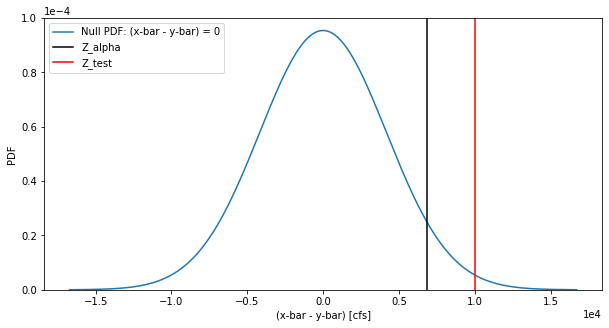

In [53]:
# Plot the results

plt.figure(figsize=(10,5))

x = np.linspace(-4, 4, num=160)
x = [i * pooled_sd for i in x]

plt.plot(x, st.norm.pdf(x, 0, pooled_sd), label='Null PDF: (x-bar - y-bar) = 0')
plt.axvline(z_alpha*pooled_sd, color='black', label='Z_alpha')
plt.axvline(ztest*pooled_sd, color='red', label='Z_test')
plt.xlabel('(x-bar - y-bar) [cfs]')
plt.ylabel('PDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylim(0,1e-4)
plt.legend(loc='best')

## As the results shows, since P=0.008<0.05, we rejected the null hypothesis within the 95% confidence.

B) How would your estimate of P change if your null hypothesis is that the difference in the mean between the two data sets is equal to 15% of the pre-1977 sample mean? (In other words, the null hypothesis is that the mean of the second period is 1.15 times the mean of the first period.)

In [54]:
# Calculate the z-test, p-value

# Now, our change is not 0.  From the question we got to know that second period=1.2*first period
#Now we think mu_late - mu_early = 0.20*mu_early
delta = .15 * mean1

z_alpha_2 = st.norm.ppf(conf, delta, pooled_sd)
# Note that this one is different from the one aboee because the delta and sd are
# included in the function

ztest2 = (mean2 - mean1 - delta)/pooled_sd

p_2 = 1 - st.norm.cdf(ztest)

print(z_alpha_2, ztest2, ztest2*pooled_sd)

11613.061173376587 1.2673764921186104 5298.942073170729


In [55]:
#Calculate P value in the new hypothesis
p = 1 - st.norm.cdf(ztest2)
print("p = ")
print(p)

p = 
0.10251035064422709


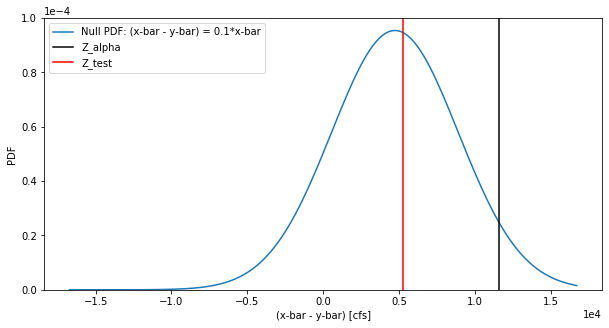

In [56]:
# Plot the results

plt.figure(figsize=(10,5))

plt.plot(x, st.norm.pdf(x, delta, pooled_sd), label='Null PDF: (x-bar - y-bar) = 0.1*x-bar')
plt.axvline(z_alpha_2, color='black', label='Z_alpha')
plt.axvline(ztest2*pooled_sd, color='red', label='Z_test')
plt.xlabel('(x-bar - y-bar) [cfs]')
plt.ylabel('PDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylim(0,1e-4)
plt.legend(loc='best')

**The P value is now 0.10251035064422709, which is higher than in question B and also higher than the 0.05 threshold.**

Lab3 for this question: https://mountain-hydrology-research-group.github.io/data-analysis/labs/lab3.0/

C) What is the type II error and power for your test on the mean in the first part of B above? To answer this, assume that the true mean has in fact increased by 15%, and the pooled standard deviation has increased by a factor of 1.15. In other words, assume that the “true” mean is 1.15 times the 1929-1976 mean, and that the “true” pooled standard deviation is 1.15 times sigma prime (our test estimate of pooled estimator for the two observed data sets). Draw a graphic to represent this true distribution, and draw where your test statistic falls on this graph. Color the area of the graph that represents type II error. Then answer the question (what is the type II error and power for your test in part B).

In [57]:
conf = .95

sd1 = stats.stdev(df_sk_b['peak_va'])
sd2 = stats.stdev(df_sk_a['peak_va'])

m = len(df_sk_a['peak_va'])
n = len(df_sk_b['peak_va'])

mean1 = stats.mean(df_sk_b['peak_va'])

z_alpha = st.norm.ppf(conf)

pooled_sd = math.sqrt(sd1**2/n + sd2**2/m)

#True means were increased by 0.15 times and true pooled stdev is 1.15 times
delta_star = .15 * mean1

sigma_star = 1.15 * pooled_sd

z_eff = (z_alpha*pooled_sd - delta_star) / sigma_star

beta = st.norm.cdf(z_eff)

power = 1 - beta

print("Our type II error is")
print (power)

Our type II error is
0.32803454547467825


Text(0.25, 3e-05, 'Type II Error')

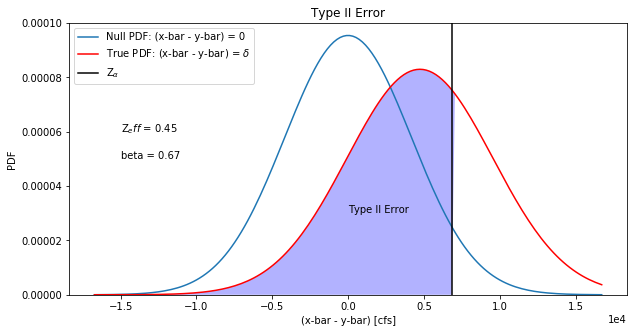

In [58]:
# Make a plot

plt.figure(1,figsize=(10,5))

x = np.linspace(-4, 4, num=160)
x = [i * pooled_sd for i in x]
    
plt.plot(x, st.norm.pdf(x, 0, pooled_sd), label='Null PDF: (x-bar - y-bar) = 0')
plt.plot(x, st.norm.pdf(x, delta_star, sigma_star), color='red', label=r'True PDF: (x-bar - y-bar) = $\delta$')
plt.axvline(z_alpha*pooled_sd, color='black', label=r'Z$_\alpha$')
plt.title('Type II Error')
plt.xlabel('(x-bar - y-bar) [cfs]')
plt.ylabel('PDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.text(-15000, 6e-5, r'Z$_eff$ = ' + str(round(z_eff,2)))
plt.text(-15000, 5e-5, 'beta = ' + str(round(beta,2)))
plt.ylim(0, 10e-5)
plt.legend(loc='best')
y=st.norm.pdf(x, delta_star, sigma_star)
plt.fill_between(x,y, where=x<=(z_alpha*pooled_sd),interpolate=True,facecolor='blue', alpha=0.3)
plt.text(0.25, 3e-5, 'Type II Error')

C) What is the type II error and power for your test on the mean in the first part of B above? 

# <font color = 'red'>Answer
    
    A Type II error occurs when the researcher accepts a null hypothesis that is false. The power for the test is 0.33734349191819
    

D) Now test the significance of the change in the mean between the two sample periods using the two-sample Wilcoxan Rank Sum test. How different is your conclusion from the one in part B. (i.e. compare P for the two tests).

In [59]:
# Use scipy.stats.wilcoxon()

w, p_w = st.ranksums(df_sk_b['peak_va'], df_sk_a['peak_va'])

z_w = st.norm.ppf(1-p_w)
print(w,z_w,p_w)

-2.3005868521963357 2.025364111085405 0.021414994904657383


In [60]:
one_sided_p = 1 - st.norm.cdf(w)
print(one_sided_p)
print(2*one_sided_p)

0.9892925025476713
1.9785850050953426


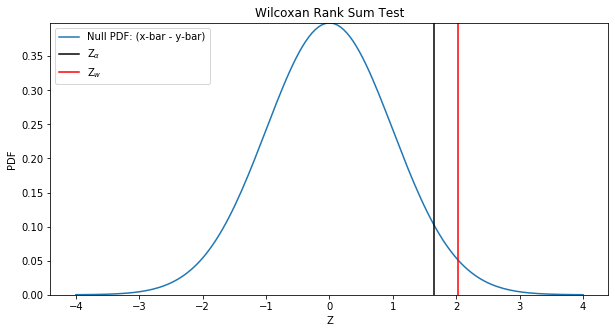

In [61]:
# Plot

plt.figure(1,figsize=(10,5))

mean_w = np.linspace(-4, 4, num=160)

plt.plot(mean_w, st.norm.pdf(mean_w), label='Null PDF: (x-bar - y-bar)')
plt.axvline(z_alpha, color='black', label=r'Z$_\alpha$')
plt.axvline(z_w, color='red', label=r'Z$_w$')
plt.title('Wilcoxan Rank Sum Test')
plt.xlabel('Z')
plt.ylabel('PDF')
plt.ylim(0, max(st.norm.pdf(mean_w)))
plt.legend(loc='best')

**According to the result above, the conclusion from D is different from B since P value in D is larger than 0.05 while P value in B is smaller than 0.05.**

 E) Lastly test for statistical significance of a change in the standard deviation. Even though it is not strictly true, assume for the moment that the sample data are derived from a normally distributed population. (We will follow up on the importance of this assumption in problem 2.) Use a single sample test (with rejection region based on the Chi Squared distribution). Assume that the sample standard deviation that you calculated from the 1929-1976 data is close to the true population standard deviation that you are testing for a change from.

In [62]:
# According to the Lab 2.3
# first calculate the test statistic
sd1 = stats.stdev(df_sk_b['peak_va']) #we pretend this is the "true population standard deviation)
sd2 = stats.stdev(df_sk_a['peak_va'])
m = len(df_sk_a['peak_va'])
t = (m-1)*sd2**2/sd1**2
print(t)

78.77338838233126


In [63]:
alpha = 0.05
vals = st.chi2.ppf(alpha, m-1)
print(vals)

26.50930319669311


**Our t statistic is larger than the cut-off value from the chi-squared distribution, so we determine that yes, with 95% confidence, a change has occurred.**

# Problem 2: Monte Carlo Tests

 

In this exercise we will estimate the statistical significance of the changes in the mean and standard deviation in Problem 1 using a Monte Carlo approach.

Conduct the analysis for the Sauk Data peak flows for water years 1929 to 2017. Start by creating CDFs of annual peak flow for the two periods of analysis in Problem 1, using the Cunnane quantile estimator discussed in class. Note: If you are using VLOOKUP in Excel, you will need to linearly extend your CDF to 0 and 1 so that you can translate all values.



(0, 95046.59999999996)

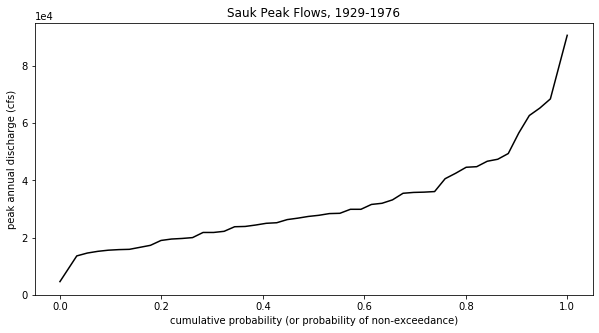

In [64]:
# Start with empirical CDFs

# The function takes an array of data as an argument and returns the data
# as an ordered array and the plotting position associated with each data point.
def quantile_fn(data):

    ordered_data = sorted(data)
    n = len(ordered_data)

    rank = []
    plotting_position = []
    for i in range(n):
        rank.append(i+1)
        # Using the Cunnane plotting position.
        plotting_position.append((rank[i]-.4)/(n+.2))
        
    return ordered_data, plotting_position

data = df_sk_b['peak_va']

x_ordered, x_plotting = quantile_fn(data)
x_CDF = [1 - i for i in x_plotting]

x_ordered.reverse()

# Extrapolate linearly to 0 and 1
xsort_first = x_ordered[0] + (x_ordered[0]-x_ordered[1]) * (1-x_CDF[0])/(x_CDF[0]-x_CDF[1])
xsort_last = x_ordered[len(x_ordered)-1] - (x_ordered[len(x_ordered)-1] - x_ordered[len(x_ordered)-2]) * x_CDF[len(x_CDF)-1]/(x_CDF[len(x_CDF)-1]- x_CDF[len(x_CDF)-2])
xsort = [xsort_first]
xsort.extend(x_ordered)
xsort.append(xsort_last)

x_CDF.insert(0, 1)
x_CDF.append(0)
                                    
# Plot
plt.figure(figsize=(10,5))
plt.plot(x_CDF, xsort, color='black')
plt.ylabel('peak annual discharge (cfs)')
plt.xlabel('cumulative probability (or probability of non-exceedance)')
plt.title('Sauk Peak Flows, 1929-1976')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylim(0, )

(0, 115336.0)

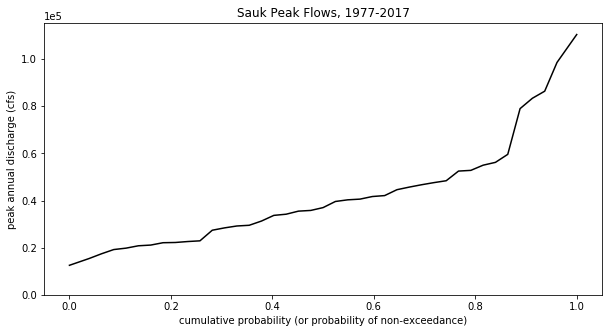

In [65]:
# Start with empirical CDFs

# The function takes an array of data as an argument and returns the data
# as an ordered array and the plotting position associated with each data point.
def quantile_fn(data):

    ordered_data = sorted(data)
    n = len(ordered_data)

    rank = []
    plotting_position = []
    for i in range(n):
        rank.append(i+1)
        # Using the Cunnane plotting position.
        plotting_position.append((rank[i]-.4)/(n+.2))
        
    return ordered_data, plotting_position

data = df_sk_a['peak_va']

x_ordered, x_plotting = quantile_fn(data)
x_CDF = [1 - i for i in x_plotting]

x_ordered.reverse()

# Extrapolate linearly to 0 and 1
xsort_first = x_ordered[0] + (x_ordered[0]-x_ordered[1]) * (1-x_CDF[0])/(x_CDF[0]-x_CDF[1])
xsort_last = x_ordered[len(x_ordered)-1] - (x_ordered[len(x_ordered)-1] - x_ordered[len(x_ordered)-2]) * x_CDF[len(x_CDF)-1]/(x_CDF[len(x_CDF)-1]- x_CDF[len(x_CDF)-2])
xsort = [xsort_first]
xsort.extend(x_ordered)
xsort.append(xsort_last)

x_CDF.insert(0, 1)
x_CDF.append(0)
                                    
# Plot
plt.figure(figsize=(10,5))
plt.plot(x_CDF, xsort, color='black')
plt.ylabel('peak annual discharge (cfs)')
plt.xlabel('cumulative probability (or probability of non-exceedance)')
plt.title('Sauk Peak Flows, 1977-2017')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylim(0, )



A) Generate 500 samples, each with n = 41 (the length of the 1977-2017 dataset), assuming the CDF from the 1929-1976 data from problem 1. Use the uniform random number generator in Matlab (or Excel if you are struggling with Matlab, although it will take longer in Excel) and the CDF you created above, following the methods discussed in class (see the sample spreadsheet referenced in the notes for specific coding details).

In [66]:
# Generate 500 sets of 41 random numbers for the simulation
q = np.random.random_sample((500, 41))

# Map to the CDF of our data, this says to look up the x_CDF value and see what actual 
# streamflow value (xsort) corresponds to it
f = interp1d(x_CDF, xsort) # create a function
Q = f(q) # evaluate the function with random values q
   
Q_mean = np.mean(Q, axis=1)

print(len(Q_mean))

Q_sd = np.std(Q, axis=1)

500


B) For each of the 500 samples, calculate the sample mean and standard deviation.

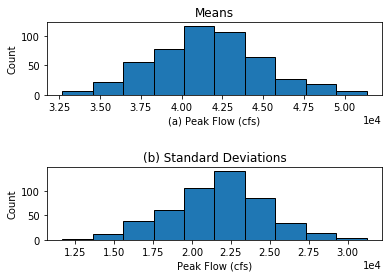

In [67]:
# Plot histograms for mean and sd
nbins = 10

fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(hspace=1)

axs[0].hist(Q_mean, nbins, ec="black")
axs[0].set_title('Means')
axs[0].set_xlabel('(a) Peak Flow (cfs)')
axs[0].set_ylabel('Count')
axs[0].ticklabel_format(axis='x', style='sci', scilimits=(0,0))

axs[1].hist(Q_sd, nbins, ec="black")
axs[1].set_title('(b) Standard Deviations')
axs[1].set_xlabel('Peak Flow (cfs)')
axs[1].set_ylabel('Count')
axs[1].ticklabel_format(axis='x', style='sci', scilimits=(0,0))

**Looking at the graph above, seems like the means and the stdevs are normally distributed.**

C) Take the 500 sample means and sample standard deviations from part B and fit an unbiased quantile estimator to them to obtain a CDF of the means and standard deviations.

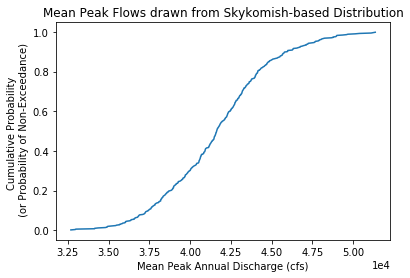

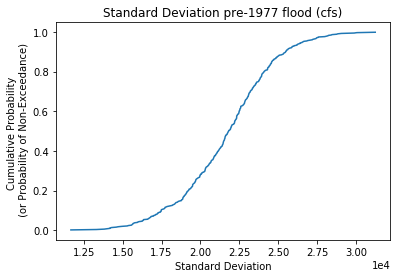

In [68]:
Qmean_ordered, Qmean_plotting = quantile_fn(Q_mean)

plt.figure(1)
plt.plot(Qmean_ordered, Qmean_plotting,label='')
plt.xlabel('Mean Peak Annual Discharge (cfs)')
plt.ylabel('Cumulative Probability \n (or Probability of Non-Exceedance)')
plt.title('Mean Peak Flows drawn from Skykomish-based Distribution')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

Qsd_ordered, Qsd_plotting = quantile_fn(Q_sd)

plt.figure(2)
plt.plot(Qsd_ordered, Qsd_plotting,label='')
plt.xlabel('Standard Deviation')
plt.ylabel('Cumulative Probability \n (or Probability of Non-Exceedance)')
plt.title('Standard Deviation pre-1977 flood (cfs)')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))


D) Extract the upper tailed 95% confidence value from this CDF for the mean and standard deviations (i.e. make a table of quantiles close to 0.95 and their associated values)

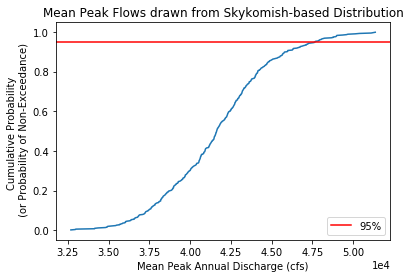

In [69]:
#Extract 95% Confidence value from mean CDF

Qmean_ordered, Qmean_plotting = quantile_fn(Q_mean)

plt.figure()
plt.plot(Qmean_ordered, Qmean_plotting,label='')
plt.xlabel('Mean Peak Annual Discharge (cfs)')
plt.ylabel('Cumulative Probability \n (or Probability of Non-Exceedance)')
plt.title('Mean Peak Flows drawn from Skykomish-based Distribution')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.axhline(0.95,color='red',label='95%')
plt.legend()


In [70]:
# Now use the interpolation function to "look-up" what Q-value that is at the intersection of
# our two lines in the graph above.
f2 = interp1d(Qmean_plotting, Qmean_ordered)
print('95% confidence value of means=')
print(f2(0.95))

95% confidence value of means=
47653.64707494982


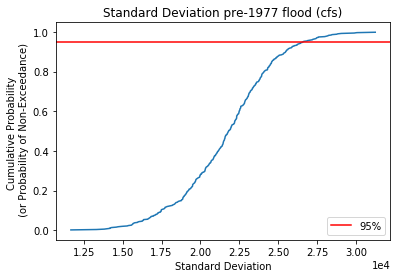

In [71]:
#Extract 95% Confidence value from stdevs CDF

Qsd_ordered, Qsd_plotting = quantile_fn(Q_sd)

plt.figure()
plt.plot(Qsd_ordered, Qsd_plotting,label='')
plt.xlabel('Standard Deviation')
plt.ylabel('Cumulative Probability \n (or Probability of Non-Exceedance)')
plt.title('Standard Deviation pre-1977 flood (cfs)')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.axhline(0.95,color='red',label='95%')
plt.legend()


In [72]:
# our two lines in the graph above.
f3 = interp1d(Qsd_plotting, Qsd_ordered)
print('95% confidence value of stdevs=')
print(f3(0.95))

95% confidence value of stdevs=
26569.19750220431


In [73]:
print('As two graphs above showed:')
print('95% confidence value of means=')
print(f2(0.95))
print('95% confidence value of stdevs=')
print(f3(0.95))

As two graphs above showed:
95% confidence value of means=
47653.64707494982
95% confidence value of stdevs=
26569.19750220431


E) Using the sample mean and standard deviation from the 1977-2017 data in problem 1, what would you conclude about the statistical significance of these values (alpha = 0.05). That is, based on the quantiles from your Monte Carlo analysis, are the observed values from 1977-2017 statistically significant for alpha = 0.05. Are these conclusions substantially different from those in Problem 1 part B and E? (In other words, compare P in the two tests. You can determine P by the quantile values associated with the CDFs you generated here.)

In [77]:
mean_sk=np.mean(df_sk_a['peak_va'])
std_sk=stats.stdev(df_sk_a['peak_va'])
print('Mean of Sauk data=',mean_sk)
print('Stdev of Sauk data=',std_sk)

Mean of Sauk data= 41607.31707317073
Stdev of Sauk data= 22358.425595778233


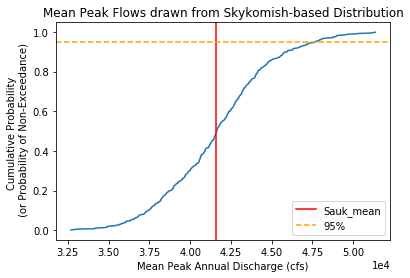

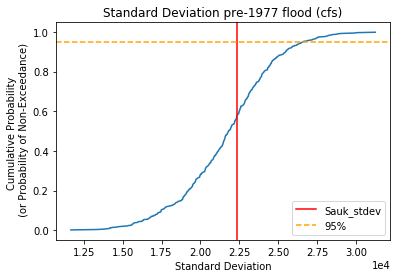

In [78]:
Qmean_ordered, Qmean_plotting = quantile_fn(Q_mean)

plt.figure(1)
plt.plot(Qmean_ordered, Qmean_plotting,label='')
plt.xlabel('Mean Peak Annual Discharge (cfs)')
plt.ylabel('Cumulative Probability \n (or Probability of Non-Exceedance)')
plt.title('Mean Peak Flows drawn from Skykomish-based Distribution')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.axvline(mean_sk,color='red',label='Sauk_mean')
plt.axhline(0.95,color='orange',linestyle='--',label='95%')
plt.legend()

Qsd_ordered, Qsd_plotting = quantile_fn(Q_sd)

plt.figure(2)
plt.plot(Qsd_ordered, Qsd_plotting,label='')
plt.xlabel('Standard Deviation')
plt.ylabel('Cumulative Probability \n (or Probability of Non-Exceedance)')
plt.title('Standard Deviation pre-1977 flood (cfs)')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.axvline(std_sk,color='red',label='Sauk_stdev')
plt.axhline(0.95,color='orange',linestyle='--',label='95%')
plt.legend()

<font color = 'red'>As it showed above, the mean value and the stdev value are below the 95% confidence value from the monte carlo test, thus we can tell that the observed values from 1977-2017 are **not** statistically significant for alpha = 0.05.

# Problem 3: Course Project Selection (Graduate Students only)

 

Write a brief paragraph (3-9 sentences) describing your term project. Include the name of your partner (or specify you will be doing the project alone), the data you will analyze, and which question(s) you will answer. Which statistical tools will you use? If you have a hypothesis to test, write it down. If you have questions about the project, now is the time to talk to the instructor.

**Group Project**

I'll doing the project with Lightman He. We choose the snow melt & stream flow topic. According to the information provided we are going to use the raw data from http://depts.washington.edu/mtnhydr/data/yosemite.shtml 'Detailed Stream Data with 95% Confidence Intervals and Raw Data Files'. We will answer the question about the relationship between the streamflow timing and the stream temperature changing and comparison through out different months and different streams.

We will use several statistical tools including hypothesis test and more from subsequent lectures, also from literature readings.

Our hypothesis: the stream teperature will be changed by the streamflow timing.